In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [4]:
pizza_data = pd.read_csv('/content/PizzaDataset.csv')

In [10]:
del pizza_data['brand']

The variables in the data set are :
1. id -- Sample analysed
2. mois 
3. prot 
4. fat 
5. ash 
6. sodium 
7. carb 
8. cal 



In [11]:
pizza_data.head()

,id,mois,prot,fat,ash,sodium,carb,cal
0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


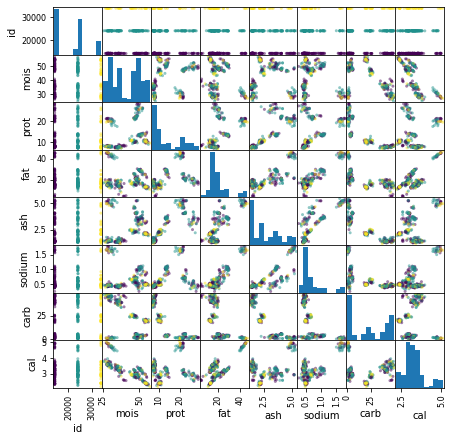

In [60]:
d = pd.plotting.scatter_matrix(pizza_data, c = pizza_data.id, figsize = (7, 7))

PREPROCESSING

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pizza_data.values)

In [ ]:
print(scaled_data)

HeatMap : a darker shade represents less co-relation while a lighter shade represents more co-relation. The diagonal of the heatmap represents the co-relation of a feature with itself – which is always 1.0, thus, the diagonal of the heatmap is of the highest shade.

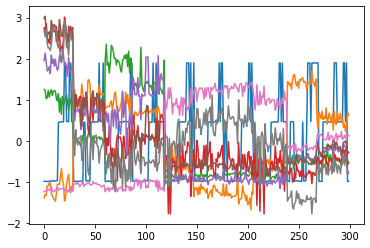

In [53]:
plt.plot(scaled_data)


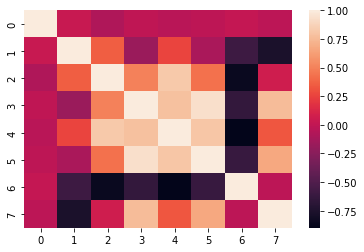

In [37]:
sns.heatmap(pd.DataFrame(scaled_data).corr())

PRINCIPLE COMPONENT ANALYSIS

In [64]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA(n_components=2)

In [73]:
pca.fit(scaled_data)

PCA(n_components=2)

In [74]:
data_pca = pca.transform(scaled_data)

In [76]:
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])

In [77]:
data_pca.head()

,PC1,PC2
0,5.029003,2.683866
1,5.042441,2.533955
2,4.824210,2.678397
3,4.488378,2.289807
4,4.490815,2.163979


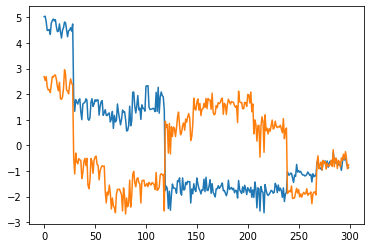

In [54]:
plt.plot(data_pca)

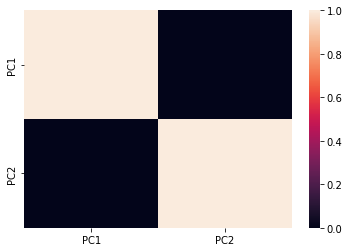

In [43]:
sns.heatmap(data_pca.corr())

In [97]:
a ="/content/graph.png"

The above heatmap clearly depicts that there is no correlation between various obtained principal components (PC1, PC2). Thus, we have moved from higher dimensional feature space to a lower-dimensional feature space while ensuring that there is no correlation between the so obtained PCs is minimum.

In [ ]:
pip install gradio

In [79]:
import gradio as gr

In [108]:
def DimensionalityReduction(pc):
    return data_pca.head() , a


In [113]:
demo = gr.Interface(fn=DimensionalityReduction, inputs=["text"],outputs=["text","image"])
demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://27128.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f9ad48837d0>,
 'http://127.0.0.1:7871/',
 'https://27128.gradio.app')